In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

See also: https://www.kaggle.com/code/sdysch/tps-july-2022/edit/run/99936538

## Idea
* Use autoencoder to compress dimensions to a latent space
* Cluster the reduced dimensionality space

In [2]:
plt.style.use('seaborn')

In [3]:
data = pd.read_csv('../input/tabular-playground-series-jul-2022/data.csv', index_col='id')

In [4]:
data

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
id,,,,,,,,,,,,,,,,,,,,,
0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,14,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,6,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,5,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,13,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,5,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97995,0.237591,1.657034,-0.689282,0.313710,-0.299039,0.329139,1.607378,5,7,8,...,-0.290116,-0.258141,-0.973640,1.369508,0.391055,2.152426,-0.208944,-1.475403,0.298448,0.445039
97996,0.322696,0.710411,0.562625,-1.321713,-0.357708,0.182024,0.178558,3,9,2,...,0.117687,1.388242,0.342400,1.680537,-0.860409,0.579165,1.162692,0.134994,0.994666,0.727642
97997,-0.249364,-0.459545,1.886122,-1.340310,0.195029,-0.559520,-0.379767,8,9,10,...,-0.850223,-1.787648,-1.268115,-1.508330,1.945622,1.503645,0.194968,2.142693,1.646042,0.641466


# Setup autoencoder model

In [5]:
import tensorflow
from tensorflow.keras.layers import Input, Normalization, Dense
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam

# preprocessing
norm = Normalization()
norm.adapt(data)

input = Input(shape=(data.shape[1],))

encoder = norm(input)

encoder = Dense(100, activation='relu')(encoder)
encoder = Dense(50, activation='relu')(encoder)
encoder = Dense(10, activation='relu')(encoder)

decoder = Dense(10, activation='relu')(encoder)
decoder = Dense(50, activation='relu')(decoder)
decoder = Dense(100, activation='relu')(decoder)

decoder = Dense(data.shape[1], activation='linear')(decoder)

autoencoder = Model(input, decoder)
encoder = Model(input, encoder)

learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
autoencoder.compile(optimizer=optimizer, loss='mean_squared_error')

autoencoder.summary()
encoder.summary()

2022-07-04 20:14:21.284434: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-04 20:14:21.382163: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-04 20:14:21.382940: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-04 20:14:21.385063: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 29)]              0         
_________________________________________________________________
normalization (Normalization (None, 29)                59        
_________________________________________________________________
dense (Dense)                (None, 100)               3000      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 50)                550   

In [6]:
batch_size = 32
epochs = 50
history = autoencoder.fit(data, data, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/50
3063/3063 [==============================] - 9s 2ms/step - loss: 2.1126
Epoch 2/50
3063/3063 [==============================] - 7s 2ms/step - loss: 1.0642
Epoch 3/50
3063/3063 [==============================] - 7s 2ms/step - loss: 1.0531
Epoch 4/50
3063/3063 [==============================] - 7s 2ms/step - loss: 1.0498
Epoch 5/50
3063/3063 [==============================] - 7s 2ms/step - loss: 1.0473
Epoch 6/50
3063/3063 [==============================] - 7s 2ms/step - loss: 1.0448
Epoch 7/50
3063/3063 [==============================] - 7s 2ms/step - loss: 1.0408
Epoch 8/50
3063/3063 [==============================] - 7s 2ms/step - loss: 1.0374
Epoch 9/50
3063/3063 [==============================] - 7s 2ms/step - loss: 1.0346
Epoch 10/50
3063/3063 [==============================] - 7s 2ms/step - loss: 1.0316
Epoch 11/50
3063/3063 [==============================] - 8s 2ms/step - loss: 1.0266
Epoch 12/50
3063/3063 [==============================] - 7s 2ms/step - loss: 1.0238
E

In [7]:
data_red = encoder.predict(data)

# KMeans

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_red = scaler.fit_transform(data_red)

In [9]:
from sklearn.cluster import KMeans
CLUSTERS = 20
SEED = 42

In [10]:
# save inertia for "elbow plot"
inertias = list()
clusters = list()
for cluster in range(2, CLUSTERS):
    model = KMeans(n_clusters=cluster, random_state=SEED)
    model.fit(data_red)
    inertias.append(model.inertia_)
    clusters.append(cluster)

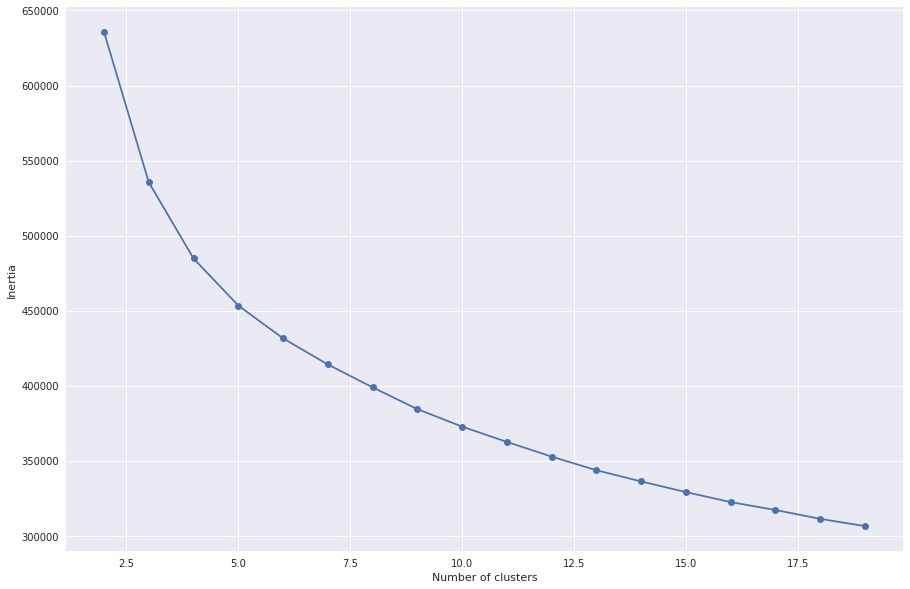

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.plot(clusters, inertias, marker='o')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia')
fig.show()

In [12]:
# arbitrary choice
model = KMeans(n_clusters=6)
model.fit(data_red)
pred = model.predict(data_red)

In [13]:
submission = pd.read_csv('../input/tabular-playground-series-jul-2022/sample_submission.csv')
submission.head()
submission["Predicted"] = pred
submission.to_csv('submission.csv', index=False)
submission.head()

,Id,Predicted
0,0,2
1,1,4
2,2,2
3,3,0
4,4,4


In [14]:
submission['Predicted'].value_counts()

2    19626
1    18186
3    17993
0    15556
5    14274
4    12365
Name: Predicted, dtype: int64